In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import textwrap

In [ ]:
df = pd.read_csv("./data/imdb_250.csv")

# Remiove rows with missing values
df["budget"] = pd.to_numeric(
    df["budget"].replace(r"[^\d.]", "", regex=True), errors="coerce"
)
df["box_office"] = pd.to_numeric(
    df["box_office"].replace(r"[^\d.]", "", regex=True), errors="coerce"
)

update_data = [
    {"name": "Harakiri", "year": 1962, "budget": np.nan, "box_office": np.nan},
    {
        "name": "Spider-Man: Into the Spider-Verse",
        "year": 2018,
        "budget": 90000000,
        "box_office": 373807069,
    },
    {
        "name": "Good Will Hunting",
        "year": 1997,
        "budget": 10000000,
        "box_office": 225933435,
    },
    {"name": "Your Name.", "year": 2016, "budget": np.nan, "box_office": 358000000},
    {"name": "High and Low", "year": 1963, "budget": np.nan, "box_office": np.nan},
    {"name": "Capernaum", "year": 2018, "budget": 4000000, "box_office": 64000000},
    {"name": "Come and See", "year": 1985, "budget": np.nan, "box_office": np.nan},
    {"name": "The Hunt", "year": 2012, "budget": 3800000, "box_office": 18309360},
    {"name": "M", "year": 1931, "budget": np.nan, "box_office": 35566},
    {"name": "Ikiru", "year": 1952, "budget": np.nan, "box_office": 96302},
    {"name": "Hamilton", "year": 2020, "budget": 12500000, "box_office": np.nan},
    {
        "name": "Like Stars on Earth",
        "year": 2007,
        "budget": np.nan,
        "box_office": 21897373,
    },
    {"name": "Dangal", "year": 2016, "budget": 10400000, "box_office": 302900000},
    {"name": "Yojimbo", "year": 1961, "budget": np.nan, "box_office": 46808},
    {
        "name": "The Secret in Their Eyes",
        "year": 2009,
        "budget": 2000000,
        "box_office": 33965000,
    },
    {
        "name": "My Neighbor Totoro",
        "year": 1988,
        "budget": 3700000,
        "box_office": 41000000,
    },
    {
        "name": "Catch Me If You Can",
        "year": 2002,
        "budget": 52000000,
        "box_office": 351100000,
    },
    {
        "name": "Children of Heaven",
        "year": 1997,
        "budget": 180000,
        "box_office": 925000,
    },
    {"name": "Klaus", "year": 2019, "budget": 40000000, "box_office": np.nan},
    {"name": "Gone Girl", "year": 2014, "budget": 61000000, "box_office": 369300000},
    {"name": "Wild Strawberries", "year": 1957, "budget": np.nan, "box_office": 60418},
    {"name": "The Third Man", "year": 1949, "budget": np.nan, "box_office": 1226507},
    {
        "name": "In the Name of the Father",
        "year": 1993,
        "budget": 13000000,
        "box_office": 65796000,
    },
    {"name": "The Wages of Fear", "year": 1953, "budget": np.nan, "box_office": 1098},
    {"name": "Sherlock Jr.", "year": 1924, "budget": np.nan, "box_office": np.nan},
    {"name": "Wild Tales", "year": 2014, "budget": 3300000, "box_office": 27000000},
    {"name": "Tokyo Story", "year": 1953, "budget": np.nan, "box_office": np.nan},
    {
        "name": "The Passion of Joan of Arc",
        "year": 1928,
        "budget": np.nan,
        "box_office": np.nan,
    },
    {"name": "Before Sunset", "year": 2004, "budget": 2700000, "box_office": 15800000},
    {"name": "Pather Panchali", "year": 1955, "budget": np.nan, "box_office": 135342},
    {
        "name": "To Be or Not to Be",
        "year": 1942,
        "budget": 1200000,
        "box_office": np.nan,
    },
    {"name": "La haine", "year": 1995, "budget": 2600000, "box_office": 280000},
    {
        "name": "Hachi: A Dog's Tale",
        "year": 2009,
        "budget": 16000000,
        "box_office": 46700000,
    },
    {"name": "Jai Bhim", "year": 2021, "budget": np.nan, "box_office": np.nan},
    {
        "name": "My Father and My Son",
        "year": 2005,
        "budget": np.nan,
        "box_office": np.nan,
    },
    {"name": "The Handmaiden", "year": 2016, "budget": 8800000, "box_office": 38600000},
    {"name": "The 400 Blows", "year": 1959, "budget": np.nan, "box_office": 127244},
    {"name": "Persona", "year": 1966, "budget": np.nan, "box_office": np.nan},
    {"name": "Aladdin", "year": 1992, "budget": 28000000, "box_office": 504000000},
]

update_df = pd.DataFrame(update_data)

# Merge the update_df with the original df on 'name' and 'year' columns, updating budget and box_office if available
df = df.merge(
    update_df[["name", "year", "budget", "box_office"]],
    on=["name", "year"],
    how="left",
    suffixes=("", "_update"),
)

# update the budget and box_office columns with the updated values from update_df if available
df["budget"] = df["budget_update"].combine_first(df["budget"])
df["box_office"] = df["box_office_update"].combine_first(df["box_office"])

#  Remove the temporary columns used for updating budget and box_office
df = df.drop(columns=["budget_update", "box_office_update"])

# Convert the 'run_time' column to minutes
def convert_runtime_to_minutes(runtime):
    if pd.isna(runtime):
        return np.nan
    try:
        runtime = runtime.strip().replace("h ", "h").replace("m", "")
        hours, minutes = 0, 0
        if "h" in runtime:
            parts = runtime.split("h")
            hours = int(parts[0]) if parts[0] else 0
            minutes = int(parts[1]) if parts[1] else 0
        else:
            minutes = int(runtime)
        return hours * 60 + minutes
    except (ValueError, IndexError):
        return np.nan

df["run_time"] = df["run_time"].apply(convert_runtime_to_minutes)

# # encode genre col
# le = LabelEncoder()
# le2 = LabelEncoder()
# df['genre_encoded'] = le.fit_transform(df['genre'])
# df['certificate_encoded'] = le2.fit_transform(df['certificate'])

# Show mapping of encoded genres
# le_mapping = dict(enumerate(le.classes_))
# print(le_mapping)

# Add a id col which is 4digit uid (number+character) on the left
import uuid
df['id'] = [str(uuid.uuid4())[:4] for _ in range(len(df))]
cols = ['id', 'rank', 'name', 'year', 'rating', 'genre', 
       'run_time', 'budget', 'box_office', 'certificate', 'tagline', 'casts', 'directors',
       'writers']
df = df[cols]

df.replace(np.nan, 0)

# df.info()
df.head(5)

,id,rank,name,year,rating,genre,certificate,run_time,budget,box_office,tagline,casts,directors,writers
0,e9e7,1,The Shawshank Redemption,1994,9.3,Drama,R,142,25000000.0,2.888450e+07,Fear can hold you prisoner. Hope can set you f...,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,7219,2,The Godfather,1972,9.2,"Crime,Drama",R,175,6000000.0,2.503418e+08,An offer you can't refuse.,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,df0d,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,152,185000000.0,1.006234e+09,Why So Serious?,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,a443,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,202,13000000.0,4.796192e+07,All the power on earth can't change destiny.,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,8dae,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,96,350000.0,9.550000e+02,Life Is In Their Hands -- Death Is On Their Mi...,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [15]:
df.columns

Index(['id', 'rank', 'name', 'year', 'rating', 'genre', 'certificate',
       'run_time', 'tagline', 'budget', 'box_office', 'casts', 'directors',
       'writers'],
      dtype='object')

### Plot1 Runtime vs Rating

/var/folders/g6/l9f6ps7n5s309r716rf3vg_00000gn/T/ipykernel_55528/3318241496.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="run_time_bins", data=df, palette="viridis")


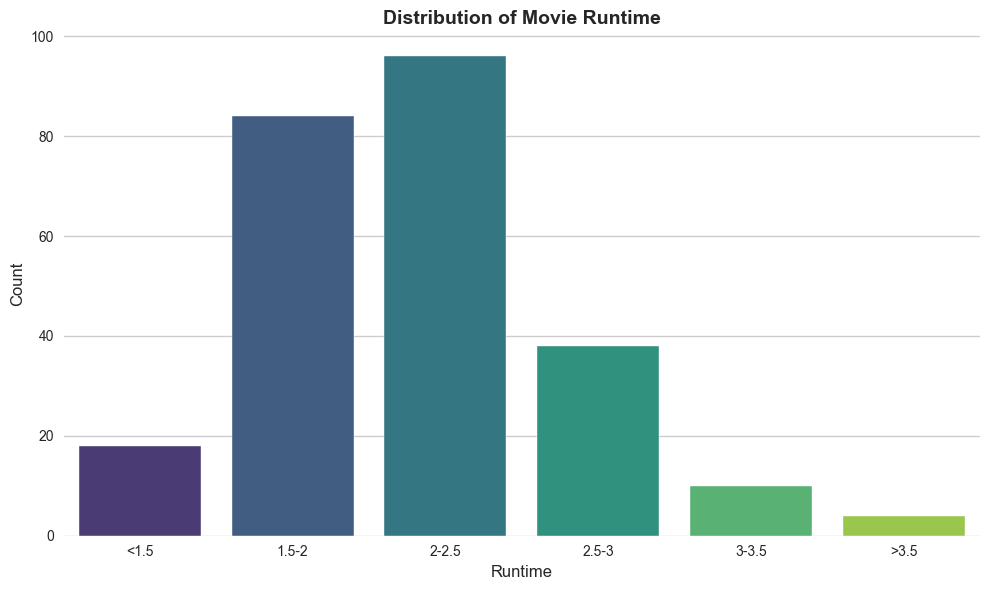

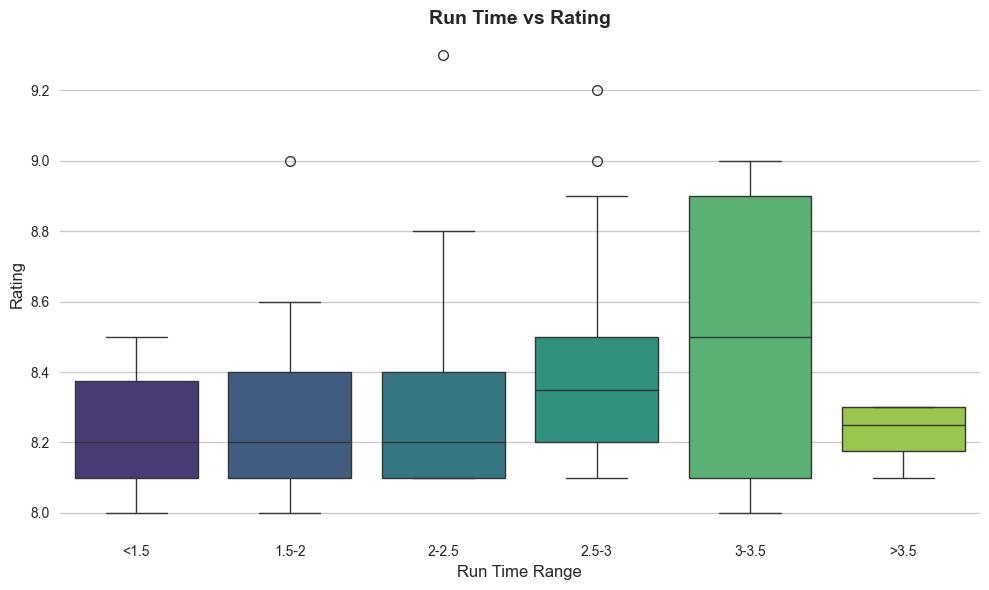

In [191]:
# Bin the run_time column into bins
bins = [0, 90, 120, 150, 180, 210, np.inf]
labels = [ '<1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '>3.5']
df["run_time_bins"] = pd.cut(df["run_time"], bins=bins, labels=labels)

sns.set_style("whitegrid")

# Runtime distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="run_time_bins", data=df, palette="viridis")
plt.title('Distribution of Movie Runtime', fontsize=14, fontweight='bold')
plt.xlabel('Runtime', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('fig/run_time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Runtime vs Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x="run_time_bins", y="rating", data=df, hue="run_time_bins", palette="viridis", legend=False)
plt.title('Run Time vs Rating', fontsize=14, fontweight='bold')
plt.xlabel('Run Time Range', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.savefig('fig/run_time_vs_rating.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [189]:
def find_outliers(group):
    Q1 = group['rating'].quantile(0.25)
    Q3 = group['rating'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group['rating'] < lower_bound) | (group['rating'] > upper_bound)]
    return outliers[['name', 'rating', 'run_time_bins']]

outliers = df.groupby('run_time_bins').apply(find_outliers).reset_index(drop=True)

print("Outliers:")
print(outliers)

Outliers:
                       name  rating run_time_bins
0              12 Angry Men     9.0         1.5-2
1  The Shawshank Redemption     9.3         2-2.5
2             The Godfather     9.2         2.5-3
3           The Dark Knight     9.0         2.5-3


/var/folders/g6/l9f6ps7n5s309r716rf3vg_00000gn/T/ipykernel_55528/1643988912.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outliers = df.groupby('run_time_bins').apply(find_outliers).reset_index(drop=True)
/var/folders/g6/l9f6ps7n5s309r716rf3vg_00000gn/T/ipykernel_55528/1643988912.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = df.groupby('run_time_bins').apply(find_outliers).reset_index(drop=True)


### Plot2 Budget vs Box office

/var/folders/g6/l9f6ps7n5s309r716rf3vg_00000gn/T/ipykernel_55528/2409878476.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_df['real_budget'] = top_10_df.apply(
/var/folders/g6/l9f6ps7n5s309r716rf3vg_00000gn/T/ipykernel_55528/2409878476.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_df['real_box_office'] = top_10_df.apply(


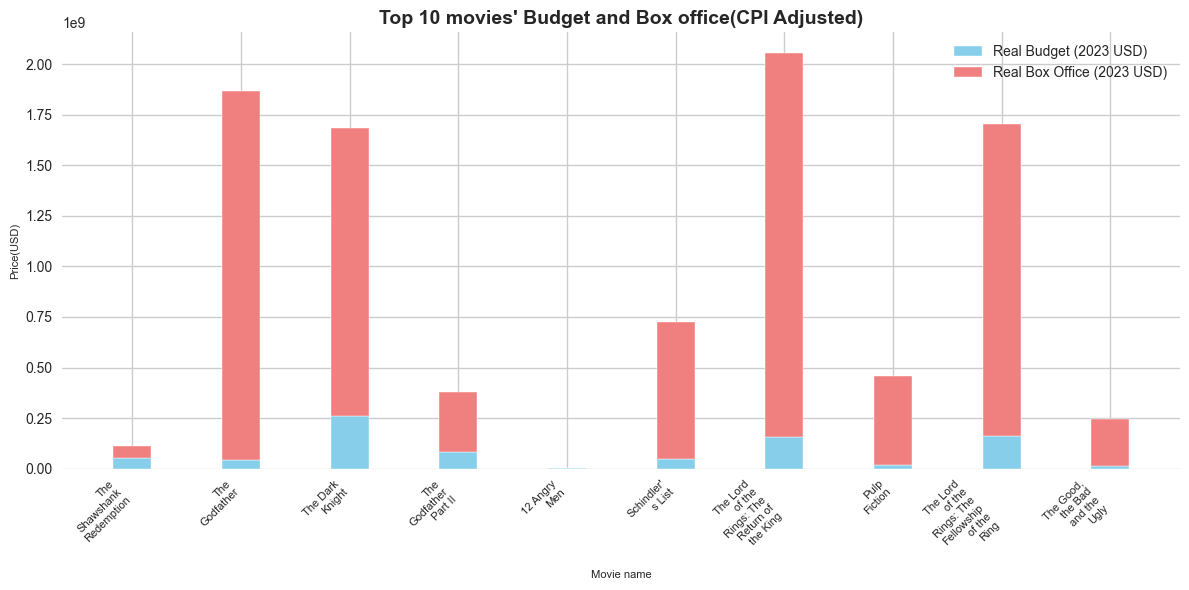

In [192]:
top_10_df = df.head(10)
df_cpi = pd.read_csv('data/cpi.csv')

df_cpi['year'] = df_cpi['year'].astype(int)

# CPI base year
base_year = 2023
base_cpi = df_cpi[df_cpi['year'] == base_year]['Annual Average CPI(-U)'].iloc[0]

def adjust_to_real_value(amount, year, cpi_df, base_cpi):
    if pd.isna(amount) or amount == 0:
        return 0
    try:
        cpi = cpi_df[cpi_df['year'] == int(year)]['Annual Average CPI(-U)']
        if cpi.empty:
            return amount 
        cpi_value = cpi.iloc[0]
        real_value = amount * (base_cpi / cpi_value)
        return real_value
    except (ValueError, IndexError):
        return amount

# Adjust budget and box_office
top_10_df['real_budget'] = top_10_df.apply(
    lambda row: adjust_to_real_value(row['budget'], row['year'], df_cpi, base_cpi), axis=1
)
top_10_df['real_box_office'] = top_10_df.apply(
    lambda row: adjust_to_real_value(row['box_office'], row['year'], df_cpi, base_cpi), axis=1
)

x = top_10_df['name']
wrapped_labels = [textwrap.fill(name, width=10) for name in x]

real_budget = top_10_df['real_budget']
real_box_office = top_10_df['real_box_office']


plt.figure(figsize=(12, 6)) 
bar_width = 0.35  


plt.bar(x, real_budget, bar_width, label='Real Budget (2023 USD)', color='skyblue')
plt.bar(x, real_box_office, bar_width, bottom=real_budget, label='Real Box Office (2023 USD)', color='lightcoral')

# Label and font size
plt.title('Top 10 movies\' Budget and Box office(CPI Adjusted)', fontsize=14, fontweight='bold')
plt.xlabel('Movie name', fontsize=8)
plt.ylabel('Price(USD)', fontsize=8)


plt.xticks(ticks=range(len(x)), labels=wrapped_labels, rotation=45, ha='right', fontsize=8)
plt.legend()
plt.tight_layout()
plt.savefig('fig/movie_budget_box_office.png', dpi=300, bbox_inches='tight')
plt.show()


### Plot3 Genre vs Rating

/var/folders/g6/l9f6ps7n5s309r716rf3vg_00000gn/T/ipykernel_55528/3429578034.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


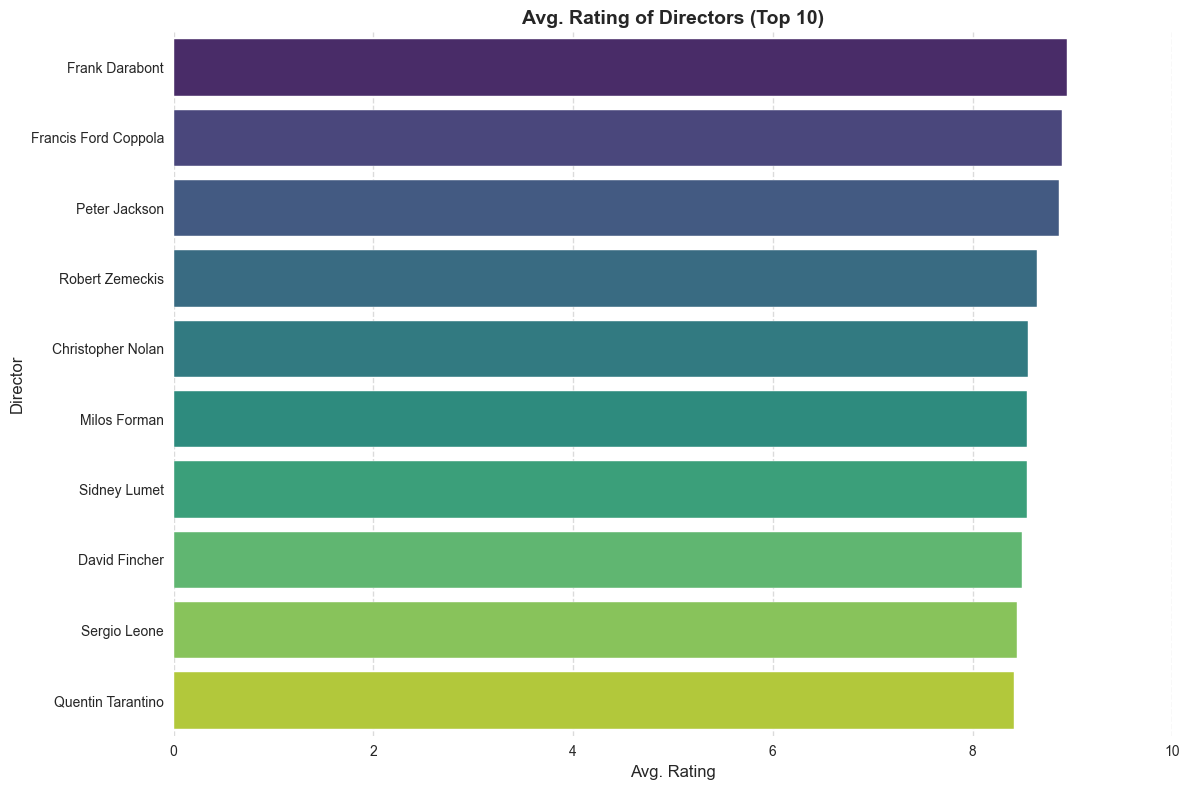


Avg Rating of Directors (Top 10):
           directors   rating
      Frank Darabont 8.950000
Francis Ford Coppola 8.900000
       Peter Jackson 8.866667
     Robert Zemeckis 8.650000
   Christopher Nolan 8.557143
        Milos Forman 8.550000
        Sidney Lumet 8.550000
       David Fincher 8.500000
        Sergio Leone 8.450000
   Quentin Tarantino 8.420000


In [193]:
# Flatten the directoes col
df['directors'] = df['directors'].fillna('Unknown') 
director_split = df[['name', 'rating', 'directors']].copy()
director_split['directors'] = director_split['directors'].str.split(',')
director_exploded = director_split.explode('directors')
director_exploded['directors'] = director_exploded['directors'].str.strip()  # 去除多餘空格

# Calculate the avg. score
director_avg_rating = director_exploded.groupby('directors')['rating'].mean().reset_index()
director_avg_rating = director_avg_rating.sort_values(by='rating', ascending=False)

# filtered the least movie a the director must directed
director_counts = director_exploded['directors'].value_counts()
min_movies = 2  # 至少執導 2 部電影的導演
valid_directors = director_counts[director_counts >= min_movies].index
filtered_director_avg = director_avg_rating[director_avg_rating['directors'].isin(valid_directors)]

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=filtered_director_avg.head(10), 
    x='rating',
    y='directors',
    palette='viridis'
)
plt.title('Avg. Rating of Directors (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('Avg. Rating', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.xlim(0, 10)  # 假設評分範圍為 0 到 10
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# 保存圖表
plt.savefig('fig/director_avg_rating.png', dpi=300, bbox_inches='tight')
plt.show()

# 輸出結果表格（前 10 位導演）
print("\nAvg Rating of Directors (Top 10):")
print(filtered_director_avg[['directors', 'rating']].head(10).to_string(index=False))

In [6]:
df.to_csv("data/clean2.csv", index=False)